In [1]:
install.packages('qqman')

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)



In [2]:
install.packages('pdftools')

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)



In [24]:
install.packages('qpdf')

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)



In [1]:
library(qqman)
library(tidyverse)
library(pdftools)
library(qpdf)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Using poppler version 0.86.1



In [3]:
#copy gwas files
system('gsutil cp $WORKSPACE_BUCKET/data/multi_ancestry/gwas_*r.tsv .',intern=T)

character(0)

In [2]:
#read and clean files of different ancestry
for (anc in c('eur','afr','amr')){
 cel <- read_tsv(paste0('gwas_',anc,'.tsv'))

 cel$locus <-gsub("chr", "", cel$locus)

 cel <- cel %>% separate(locus, into = c("CHR", "BP"), sep = ":")


 cel[(cel$CHR=='X'),'CHR'] <- '23'

 cel[(cel$CHR=='Y'),'CHR'] <- '24'

 cel <- drop_na(cel,'p_value')

 cel$CHR <- as.numeric(cel$CHR)

 cel$BP <- as.numeric(cel$BP)

 assign(paste0("cel_",anc),cel)
}

Rows: 11004837 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): locus, alleles, fit
dbl (4): beta, standard_error, z_stat, p_value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
plot_manhattan <- function(results,ymax,title) {
    options(repr.plot.width = 20, repr.plot.height = 10)
    manhattan(results,
              suggestiveline = 5,
              genomewideline=8,
              logp=TRUE,
              annotateTop = FALSE,
              chrlabs = c(1:22,"X", "Y"),
              ylim = c(0, ymax),
              p='p_value',
              snp='alleles',
              cex = 1.25,
              cex.axis = 1,
              cex.lab = 1.25,
              col = c("blue4", "orange3"), # Colors for the chromosomes
              family='Times New Roman',
              main = title,
              #xlim = c(26000000, 35000000),
              #sub = PLOT_SUBTITLE
             )
  
}


NULL

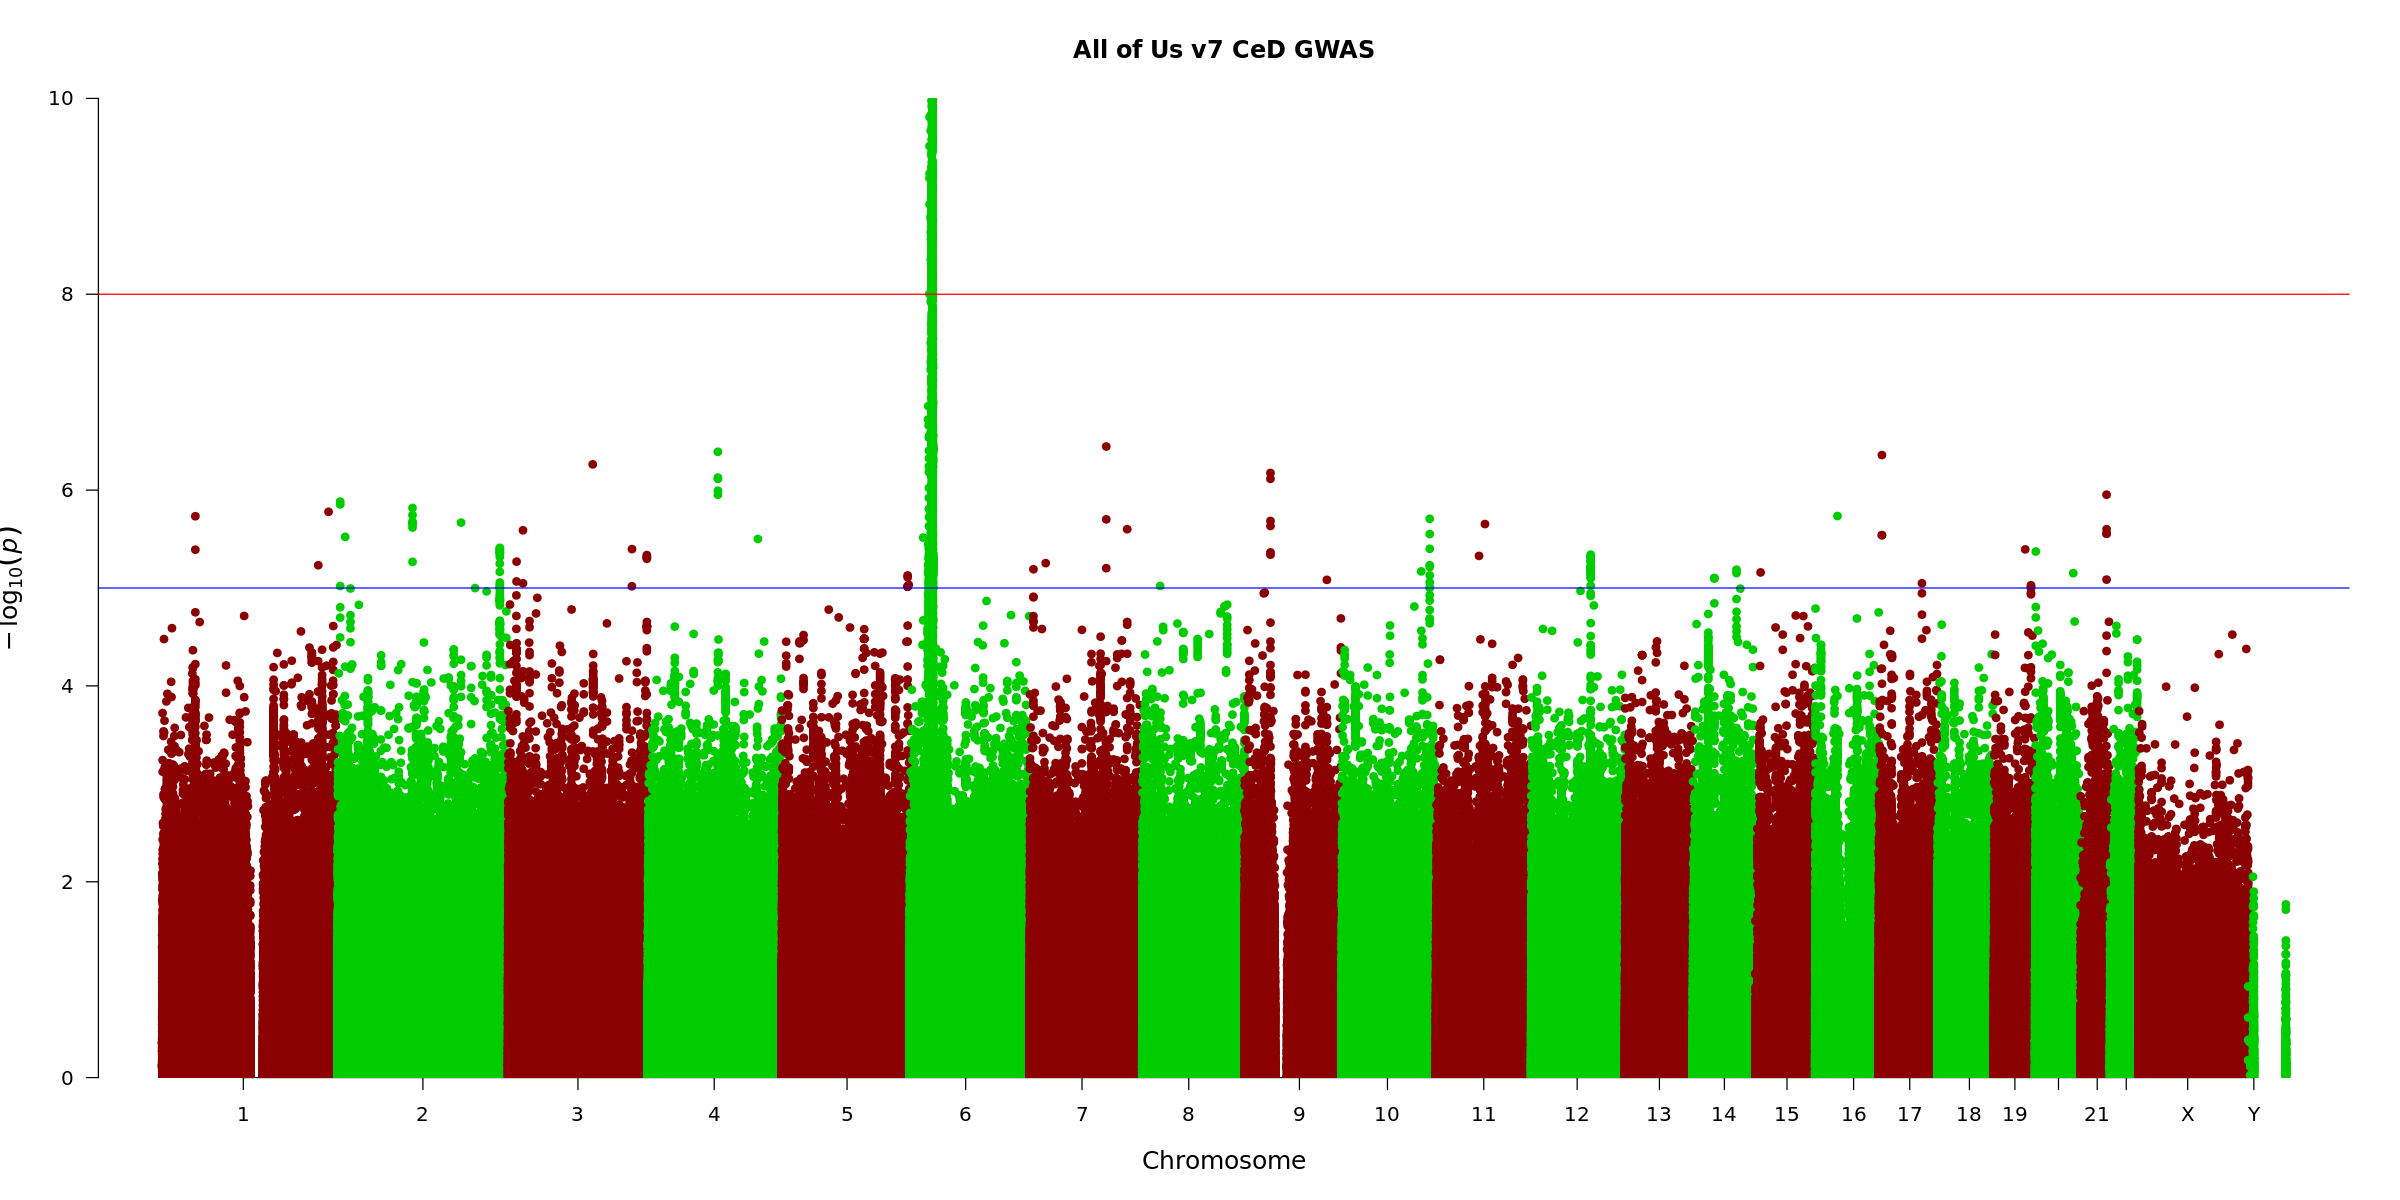

In [13]:
plot_manhattan(cel)


In [5]:
# Open the PNG device
png(file='gwas_man_eur_full.png', width=2000, height=1000, family='ArialMT')
#par(mfrow = c(3, 1))

# Create your plot
plot_manhattan(cel_eur,101,'EUR')

# Close the device
dev.off()

png 
  2

In [ ]:
# Open the PNG device
png(file='gwas_man_amr_full.png', width=2000, height=1000, family='ArialMT')
#par(mfrow = c(3, 1))

# Create your plot
plot_manhattan(cel_amr,101,'AMR')

# Close the device
dev.off()

In [ ]:
# Open the PNG device
png(file='gwas_man_afr_full.png', width=2000, height=1000, family='ArialMT')
#par(mfrow = c(3, 1))

# Create your plot
plot_manhattan(cel_afr,101,'AFR')

# Close the device
dev.off()

In [7]:
cel_eur_sig <- cel_eur %>% filter(p_value < 1e-5) %>% mutate(pop='eur')
cel_amr_sig <- cel_amr %>% filter(p_value < 1e-5) %>% mutate(pop='amr')
cel_afr_sig <- cel_afr %>% filter(p_value < 1e-5) %>% mutate(pop='afr')
full_sig <- rbind(cel_eur_sig,cel_amr_sig,cel_afr_sig)

In [8]:
full_sig %>% write_csv('multi_ancestry_gwas_sig.csv')

CHR,BP,alleles,beta,standard_error,z_stat,p_value,fit,pop
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,161079872,"[""A"",""G""]",-94.48900,21.256000,-4.4452,8.7810e-06,"{""n_iterations"":7,""converged"":true,""exploded"":false}",eur
1,221607617,"[""T"",""C""]",-146.67000,32.711000,-4.4836,7.3377e-06,"{""n_iterations"":6,""converged"":true,""exploded"":false}",eur
1,234263833,"[""A"",""G""]",0.42269,0.093690,4.5116,6.4338e-06,"{""n_iterations"":4,""converged"":true,""exploded"":false}",eur
1,236151286,"[""C"",""T""]",-0.41384,0.085575,-4.8360,1.3248e-06,"{""n_iterations"":4,""converged"":true,""exploded"":false}",eur
1,246213233,"[""A"",""T""]",0.82857,0.185650,4.4630,8.0804e-06,"{""n_iterations"":5,""converged"":true,""exploded"":false}",eur
1,246221449,"[""G"",""A""]",0.82646,0.185680,4.4510,8.5460e-06,"{""n_iterations"":5,""converged"":true,""exploded"":false}",eur
1,246221604,"[""G"",""A""]",0.82935,0.185620,4.4680,7.8941e-06,"{""n_iterations"":5,""converged"":true,""exploded"":false}",eur
2,3765493,"[""T"",""C""]",-0.25826,0.057763,-4.4710,7.7850e-06,"{""n_iterations"":4,""converged"":true,""exploded"":false}",eur
2,3765517,"[""T"",""G""]",-0.25983,0.057742,-4.4998,6.8023e-06,"{""n_iterations"":4,""converged"":true,""exploded"":false}",eur


## overlapping SNPs

In [9]:
# Use table() to get the value counts
ct <- full_sig %>%
  count(CHR, BP, alleles)

In [17]:
allele=ct %>% filter(n > 1)

In [21]:
full_sig_final <- full_sig %>% filter((CHR==6)&(BP %in% allele$BP)&(alleles %in% allele$alleles)) %>% arrange(BP)
full_sig_final

CHR,BP,alleles,beta,standard_error,z_stat,p_value,fit,pop
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
6,32665649,"[""G"",""C""]",0.95821,0.054159,17.6930,4.7900e-70,"{""n_iterations"":5,""converged"":true,""exploded"":false}",eur
6,32665649,"[""G"",""C""]",0.88553,0.181430,4.8809,1.0562e-06,"{""n_iterations"":5,""converged"":true,""exploded"":false}",amr
6,32666412,"[""C"",""T""]",0.95968,0.054265,17.6850,5.4613e-70,"{""n_iterations"":5,""converged"":true,""exploded"":false}",eur
6,32666412,"[""C"",""T""]",0.89132,0.182730,4.8777,1.0732e-06,"{""n_iterations"":5,""converged"":true,""exploded"":false}",amr
6,32668787,"[""T"",""C""]",0.96053,0.054159,17.7350,2.2445e-70,"{""n_iterations"":5,""converged"":true,""exploded"":false}",eur
6,32668787,"[""T"",""C""]",0.93610,0.183000,5.1152,3.1338e-07,"{""n_iterations"":5,""converged"":true,""exploded"":false}",amr
